In [94]:
using LinearAlgebra
#=
    Task 1 :
            Function to represent the initial normalized state vector in  Cn

    1)
    Function name : initial_state
    Requirements  :
                    1) Compute the number of qubits required to represent the domain
                    2) Calculate the intial functional approximation in the domain
                    3) Compure norm of the functional set
                    4) Normalize the initial functional set
    Params 1      : x,f(x)            // Domain for discretization and intial state function
    Output        : n, T0             // Number of qubits required, Initial state in Cn

    2)
    Function name : discretize
    Requirements  : Discretize the domain using the passed parameters
    Params 1      : x_initial , x_final , N    // N := number of discretization points
    Output        : x                          // Domain of discretization

    3)
    Function name : toeplitz
    Requirements  :
                    1) Construct toeplitz matrix for an arbitrary dimension n.
                    2) Main diagonal := 1 + 2 tau/h^2
                    3) Other diagonals := -tau/h^2
    Params 1      : n , tau , h
    Output        : U belongs to a Toeplitz matrix in Cn.

    4)
    Function name : update_matrix
    Requirements  :
                    1) Compute B := A^m;
    Params 1      : m (The number of time steps that we take
                        T_final = m*tau)
    Output        : A^m matrix, that recursively returns the product;

    5) TO DO  : Read the paper on Hamiltonian simulation. Write a function that computes the Hardcoded Hamiltonian
                in the system. 
=#

function discretization_density(n)
    vector_length = 2^n+2; 
    return vector_length; 
end     

function discretize(x_intial,x_final,N)
    x = LinRange(x_intial,x_final,N);
    return x;
end

function cournants_tau(N)
    h = 1/(N-1); 
    tau = 2/h^2; 
    return tau; 
end

function initial_state(x,f,tau)
    n = length(x);
    # But in the discretization equation Ax = b we do not account boundary values. So N ~= N-2;
    #n_qubits = log(2,n-1);
    h = x[2]-x[1];
    # Compute f(x_i)
    T_0 = f(x[2:n-1]).*(h^2/tau);
    # Add boundary conditions on to b
    temp1 = zeros(n-2);
    temp1[1] = f(x[1]);
    temp1[2] = f(x[n]);
    temp2 = temp1 + T_0;
    T_0 = temp2;
    # Norm of T_0
    T_0 = T_0 / norm(T_0);
    return T_0 ;
end

function toeplitz(n,tau,h)
    k1 = (1 + 2*tau/h^2)*ones(n);
    k2 = (-tau/h^2)*ones(n-1);
    return Tridiagonal(k2,k1,k2)./(tau/h^2);
end

function update_matrix(tau,m,n)
    h = 1/(N-1);
    A = toeplitz(n,tau,h);
    return A;
end


update_matrix (generic function with 1 method)

In [106]:
#= 
    Solving the one dimensional Diffussion equation using the HHL algorithm     

=#  

# import Libraries
#include("Utilities.jl")
using Qaintessent 
using LinearAlgebra 
using Plots 

#=
Define the problem 

From a computational perspective we agreed to simluate the system for 5 qubits. 
However out decision to restrict ourselves to a coarser grid should not affect out ability to scale the simulation. 
Hence all the functions are defined in a generic manner. 
=# 

# Define the domain and system parameters :  We assume a scaled PDE. 

# Sample function for RHS 

begin 
    zmin = 0; 
    zmax = pi;
    n_qubits = 5; 
    N = discretization_density(5); 
    t_end = 5;
    tau =  0.1
    n_time_steps = t_end/tau; 
    f_sample(x) = sin.(x); 
    z = discretize(zmin,zmax,N); 
    rhs = initial_state(z,f_sample,tau);
    A = update_matrix(tau,n_time_steps,N-2); 
end
println("Parameters initialized")

Parameters initialized


# Question 1 

When domain is set to [0,1] , the normalized sine function behaves awkardly. \
Is this a concern ? 

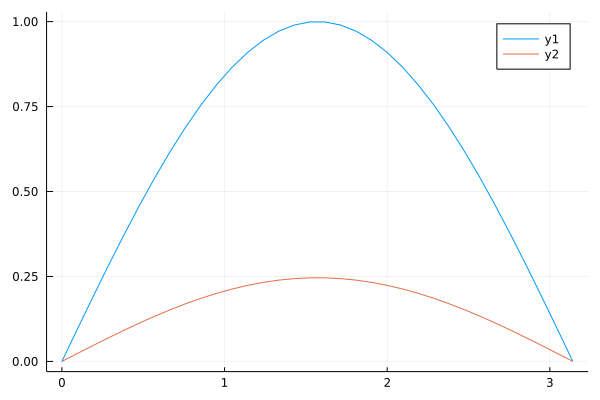

In [102]:
@assert(norm(rhs)≈1)
b = vcat(f_sample(z[1]),initial_state(z,f_sample,tau),f_sample(z[N]));
plot(z,f_sample(z))
plot!(z,b)

# Question 2 

Is this implementation right ? 

In [104]:
exp(1im*Array(A));

# Constructing the circuit 